**Has the network latency gone up since we switched internet service providers?**

Null Hypothesis - The network latency has not gone up since we switched internet service providers.
Alternative Hypothesis - The network latency has gone up since we switched internet service providers.
True Positive - The internet service provider does affect the network latency, and we were correct.
True Negative - The internet service provider does  NOT affect the network latency, and we were correct.
Type 1 Error - The internet service provider does affect the network latency, and we were WRONG.
Type 2 Error - The internet service provider does NOT affect the network latency, and we were WRONG.

**Does the instagram redesign increase screen hours per user on the app?**

Null Hypothesis - The instagram redesign had no effect on user screen hours per day.
Alternative Hypothesis - The instagram redesign did effect user screen hours per day.
True Positive - The new design allows users to easily access reels which is found to increase screen hours per day.
True Negative - The redesigned home page resulted in a similar month to month user screen hours per day.
Type 1 Error - The algorithm was boosting reels content that month which caused higher screen hours, not the redesign.
Type 2 Error - After the redesign more users spent their screen hours on reels instead of the main feed each day.

**Does more advertisments of the new Chevy Silverado drive up sales?**

Null Hypothesis - Sales of the new Chevy Silverado were not affected with increased advertisements.
Alternative Hypothesis - Sales of the new Chevy Silverado were affected with increased advertisements.
True Positive - The more money spent on advertisements the more the sales across the country for that year.
True Negative - More money spent on advertisements did not show a change in sales for that year.
Type 1 Error - Sales only increased during the year for the big savings month in december, not because of the advertisements.
Type 2 Error - More advertisements drove up sales in southern states rather than the whole country.

In [1]:
import pandas as pd
import numpy as np

from pydataset import data

from scipy import stats

**Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.**

In [4]:
alpha = 0.05
data = {
    "Uses_a_Macbook": [49, 20],
    "Doesnt_Use_A_Macbook": [1, 30]
}

index_names = ["Codeup_Student", "Not_Codeup_Student"]

observed = pd.DataFrame(data, index=index_names)
observed

,Uses_a_Macbook,Doesnt_Use_A_Macbook
Codeup_Student,49,1
Not_Codeup_Student,20,30


In [5]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [6]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[49  1]
 [20 30]]

Expected
[[34 15]
 [34 15]]

----
chi^2 = 36.6526
p     = 0.0000


In [7]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


We can conclude there is a relationship between being a codeup studet and owning a macbook.

**Choose another 2 categorical variables from the mpg dataset.**


In [22]:
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


* State your null and alternative hypotheses.

- $H_o$: There is no relationship between manufacturer and engine cylinders
- $H_a$: There is a relationship between manufacturer and engine cylinders

* State your alpha.

In [12]:
alpha = 0.05

* Perform a chi2 test of independence.

In [23]:
observed_mpg = pd.crosstab(df.manufacturer, df.cyl)
chi2, p, dof, expected = stats.chi2_contingency(observed_mpg)

In [24]:
print('Observed')
print(observed_mpg.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 8  0  9  1]
 [ 2  0  3 14]
 [ 1  0 15 21]
 [ 0  0 10 15]
 [ 9  0  0  0]
 [ 8  0  6  0]
 [ 0  0  3  5]
 [ 0  0  0  4]
 [ 0  0  0  3]
 [ 0  0  2  2]
 [ 4  0  8  1]
 [ 0  0  4  1]
 [14  0  0  0]
 [18  0 13  3]
 [17  4  6  0]]

Expected
[[ 6  0  6  5]
 [ 6  0  6  5]
 [12  0 12 11]
 [ 8  0  8  7]
 [ 3  0  3  2]
 [ 4  0  4  4]
 [ 2  0  2  2]
 [ 1  0  1  1]
 [ 1  0  1  0]
 [ 1  0  1  1]
 [ 4  0  4  3]
 [ 1  0  1  1]
 [ 4  0  4  4]
 [11  0 11 10]
 [ 9  0  9  8]]

----
chi^2 = 198.1175
p     = 0.0000


* State your conclusion.

In [25]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    ('Fail to reject the null hypothesis')

Reject the null hypothesis


**Use the data from the employees database to answer these questions:**

In [2]:
import env
employees = pd.read_sql('select * from employees limit 5', env.get_db_url(env.username, env.hostname, env.password, 'employees'))
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


* Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

- $H_o$: There is no relationship between gender and working in sales or marketing
- $H_a$: There is a relationship between gender and working in sales or marketing

In [46]:
gender_and_department = pd.read_sql('''select de.to_date, d.dept_name, e.gender
from dept_emp as de
join employees as e
	using (emp_no)
join departments as d
	on d.dept_no = de.dept_no
where de.to_date = '9999-01-01' and d.dept_name = 'Sales' 
or de.to_date = '9999-01-01' and d.dept_name = 'Marketing'
    ;''', env.get_db_url(env.username, env.hostname, env.password, 'employees'))
gender_and_department

,to_date,dept_name,gender
0,9999-01-01,Marketing,F
1,9999-01-01,Marketing,M
2,9999-01-01,Marketing,F
3,9999-01-01,Marketing,F
4,9999-01-01,Marketing,F
...,...,...,...
52538,9999-01-01,Sales,F
52539,9999-01-01,Sales,M
52540,9999-01-01,Sales,M
52541,9999-01-01,Sales,F


In [47]:
observed_employees_dept = pd.crosstab(gender_and_department.dept_name, gender_and_department.gender)
observed_employees_dept

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


In [51]:
alpha = 0.05

chi2, p, dof, expected = stats.chi2_contingency(observed_employees_dept)

print('Observed')
print(observed_employees_dept.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 5864  8978]
 [14999 22702]]

Expected
[[ 5893  8948]
 [14969 22731]]

----
chi^2 = 0.3240
p     = 0.5692


In [53]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


* Is an employee's gender independent of whether or not they are or have been a manager?

- $H_o$: There is no relationship between gender and being a manager or not
- $H_a$: There is a relationship between gender and being a manager or not

In [3]:
managers = pd.read_sql('''select emp_no
from dept_manager;''', env.get_db_url(env.username, env.hostname, env.password, 'employees'))
managers

,emp_no
0,110022
1,110039
2,110085
3,110114
4,110183
5,110228
6,110303
7,110344
8,110386
9,110420


In [4]:
not_managers = pd.read_sql('''select *
from dept_manager
	right join employees
		using(emp_no);''', env.get_db_url(env.username, env.hostname, env.password, 'employees'))

In [5]:
not_managers.to_date.value_counts(dropna=False)

to_date
None          300000
9999-01-01         9
1989-05-06         1
1992-09-08         1
1988-10-17         1
1991-04-08         1
1991-03-07         1
1994-06-28         1
1991-09-12         1
1992-04-25         1
1991-10-01         1
1996-08-30         1
1992-08-02         1
1988-09-09         1
1992-03-21         1
1989-12-17         1
1996-01-03         1
Name: count, dtype: int64

In [7]:
not_managers['is_manager'] = not_managers.to_date.notnull()
not_managers.is_manager.value_counts()

is_manager
False    300000
True         24
Name: count, dtype: int64

In [9]:
alpha = 0.05
observed = pd.crosstab(not_managers.is_manager, not_managers.gender)

In [10]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [11]:
p

0.22745818732810363

**conclude**
There is no relationship between gender and being a manager

**Answer with the type of stats test you would use (assume normal distribution):**


* Is there a relationship between the length of your arm and the length of your foot?

Person's Correlation Test

* Does smoking affect when or not someone has lung cancer?

Chi Squared

* Is gender independent of a person’s blood type?


Chi Squared

* Does whether or not a person has a cat or dog affect whether they live in an apartment?


Chi Squared

* Does the length of time of the lecture correlate with a student's grade?


Person's Correlation Test

**Use the telco_churn data.**

* Does tenure correlate with monthly charges?

In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

(0.24789985628615246, 4.094044991476844e-99)

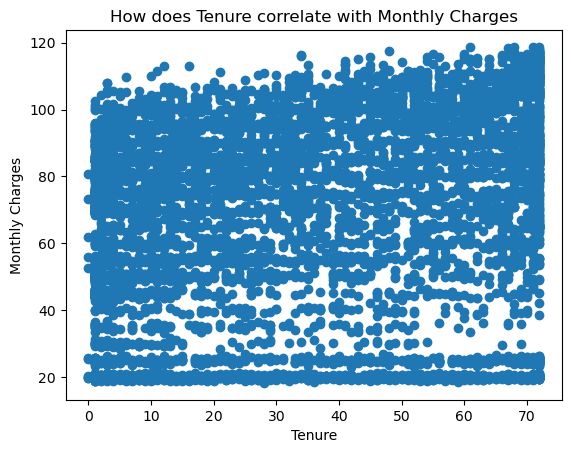

In [62]:
telco_churn = pd.read_sql('select * from customers;', env.get_db_url(env.username, env.hostname, env.password, 'telco_churn'))
plt.scatter( telco_churn.tenure, telco_churn.monthly_charges)
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('How does Tenure correlate with Monthly Charges')
r, p = stats.pearsonr(telco_churn.monthly_charges, telco_churn.tenure)
r, p

In [63]:
alpha = 0.05
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


* Total charges?


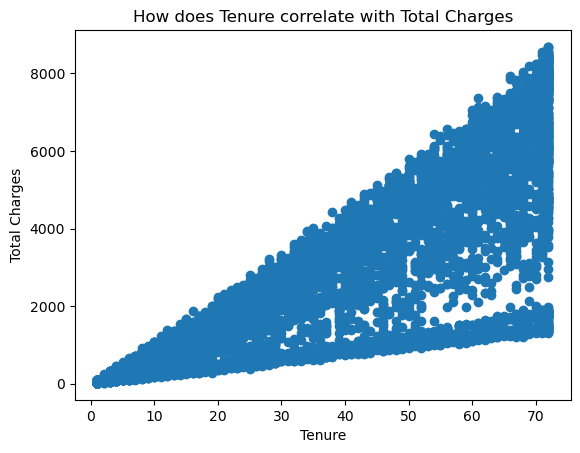

(0.8258804609332071, 0.0)

In [65]:
telco_churn['total_charges'] = pd.to_numeric(telco_churn['total_charges'], errors='coerce')
telco_churn = telco_churn.dropna(subset=['total_charges', 'tenure'])
plt.scatter(telco_churn.tenure, telco_churn.total_charges)
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('How does Tenure correlate with Total Charges')
plt.show()
r, p = stats.pearsonr(telco_churn.total_charges, telco_churn.tenure)
r, p

In [66]:
alpha = 0.05
if p == 0:
    print('There is no correlation')
elif p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

There is no correlation


* What happens if you control for phone and internet service?

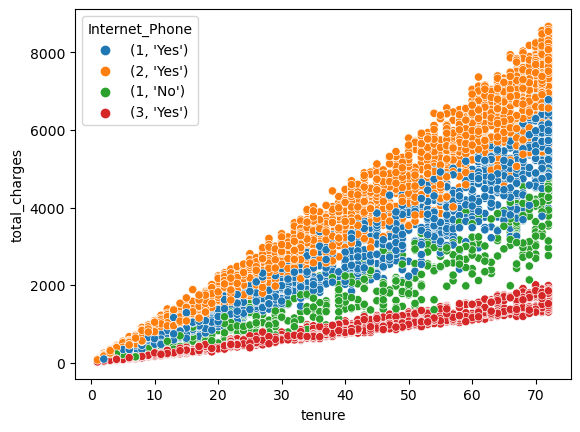

In [115]:
telco_churn['total_charges'] = pd.to_numeric(telco_churn['total_charges'], errors='coerce')
telco_churn = telco_churn.dropna(subset=['total_charges', 'tenure'])
telco_churn['Internet_Phone'] = telco_churn[['internet_service_type_id', 'phone_service']].apply(tuple, axis=1)
sns.scatterplot(data=telco_churn, x='tenure', y='total_charges', hue='Internet_Phone')
plt.show()

In [131]:
internet_1 = telco_churn [telco_churn.internet_service_type_id == 1]
r, p = stats.pearsonr(internet_1.tenure, internet_1.total_charges)
print('internet_1')
print('  r =', r)
print('  p =', p)
internet_2 = telco_churn [telco_churn.internet_service_type_id == 2]
r, p = stats.pearsonr(internet_2.tenure, internet_2.total_charges)
print('internet_2')
print('  r =', r)
print('  p =', p)
internet_3 = telco_churn [telco_churn.internet_service_type_id == 3]
r, p = stats.pearsonr(internet_3.tenure, internet_3.total_charges)
print('internet_3')
print('  r =', r)
print('  p =', p)

internet_1
  r = 0.9411848215629808
  p = 0.0
internet_2
  r = 0.9853093528070621
  p = 0.0
internet_3
  r = 0.9814648859044293
  p = 0.0


In [103]:
telco_churn.Internet_Phone

0       (1, Yes)
1       (1, Yes)
2       (2, Yes)
3       (2, Yes)
4       (2, Yes)
          ...   
7038    (1, Yes)
7039    (2, Yes)
7040    (1, Yes)
7041    (1, Yes)
7042     (1, No)

0       (1, Yes)
1       (1, Yes)
2       (2, Yes)
3       (2, Yes)
4       (2, Yes)
          ...   
7038    (1, Yes)
7039    (2, Yes)
7040    (1, Yes)
7041    (1, Yes)
7042     (1, No)
Name: Internet_Phone, Length: 7032, dtype: object

**Use the employees database.**

In [134]:
employees2 = pd.read_sql('select * from employees limit 5', env.get_db_url(env.username, env.hostname, env.password, 'employees'))
employees2.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


* Is there a relationship between how long an employee has been with the company and their salary?


* Is there a relationship between how long an employee has been with the company and the number of titles they have had?